Acquire Data Through Web Scraping

Whtne the data you need is not accesssible through CSVs, APIs SQL or other types.

At a high level, we'll go about web scraping through this process:

1. Manually explore the site in a web browser, and identify the relevant HTML elements
1. Use the `requests` modelule to obtain the HTML from the page
1. Use `BeautifulSoup` to parse the HTML and obtain te text / data that we want. 
1. Scrip the process of requesting another page and parsing the data from it as well. 
1. Take this data further down the data science pipeline. 

**Steps**

1. Import the `get()` function from the requests modeule, BeautifulSoup from bs4 and pandas. 
1. Assign the address of the web page to a variable named url
1. Request the server the content of the web page by using `get()`, and store the server's response in the variable response. 
1. Print the response text to ensure you have an html page. 
1. Take a look at the actual web page contents and inspect the source to understand the structure a bit
1. Use `BeautifulSoup` to parse the HTML into a variable ('soup')
1. Identify the key tags you need to extract the data you are looking for. 
1. Create a dataframe of the data desired
1. Run some summary stats and inspect the data to ensure you have what you wanted. 
1. Edit the data structure as needed, especially so that one column has all thetext you want included in this analysis
1. Create a corpus of the column with the text you want to analize
1. Store that corpus for use in a future notebook


In [1]:
from requests import get
from bs4 import BeautifulSoup
import os

In [2]:
# We will look at an article from Codeup's blog

url = 'https://codeup.com/codeups-data-science-career-accelerator-is-here/'
headers = {'User-Agent': 'Codeup Bayes Data Science'} # codeup.com doesn't like our default user-agent
response = get(url, headers=headers)

After making the request, we'll perform a quick sanity check to make sure what we are looking at is indeed HTML data.

In [4]:
print(response.text[:400])

<!DOCTYPE html><html lang="en-US"><head ><meta charset="UTF-8" /><meta name="viewport" content="width=device-width, initial-scale=1" /> <script>function fvmuag(){if(navigator.userAgent.match(/x11.*fox\/54|oid\s4.*xus.*ome\/62|oobot|ighth|tmetr|eadles|ingdo/i))return!1;if(navigator.userAgent.match(/x11.*ome\/75\.0\.3770\.100/i)){var e=screen.width,t=screen.height;if("number"==typeof e&&"number"==ty


Now we will take a look at the actual web page contents and inspect the source to understand the structure a bit.

As we see from the first line of the response, the server sent us an HTML document. This document describes the overall structure of that web page, along with its specific content (which is what makes that particular page unique).

For the most part, all of the pages from a single website will have the same (or very similar) overall structure. To write our script, we will need to understand the HTML structure of one page, and we will use the browser’s Developer Tools to do that.

command + option + u will let you view the source of a page in chrome.
command + option + i will open up the chrome dev tools page inspector.
Right clicking on specific text in the page and selecting 'inspect' will take you right to the html of that text
In general, we'll be looking for HTML tags, and using a couple properties of those tags to identify the content that we want. Two element properties are important to us:

* `class`: This is a list of the class(es) that are applied to an element, these can be used to target certain elements, but are not guaranteed to be unique.
* `id`: This is a unique identifier for an element on a page.



We'll use the beautiful soup library to work with HTML data in python.



In [5]:
soup = BeautifulSoup(response.content, 'html.parser')

In [9]:
# see also `soup.find_all`
#
# beautiful soup uses `class_` as the keyword argument for searching
# for a class because `class` is a reserved word in python
# we'll use the class name that we identified from looking in the inspector in chrome
article = soup.find('div', class_='jupiterx-post-content clearfix')
article

<div class="jupiterx-post-content clearfix" itemprop="text"><p>The rumors are true! The time has arrived. Codeup has officially opened applications to our new Data Science career accelerator, with only 25 seats available! This immersive program is one of a kind in San Antonio, and will help you land a job in <strong><a href="https://www.glassdoor.com/List/Best-Jobs-in-America-LST_KQ0,20.htm">Glassdoor’s #1 Best Job in America</a></strong>.</p><p><a href="https://tribucodeup.wpengine.com/what-is-data-science/"><strong>Data Science is a method of providing actionable intelligence from data.</strong></a> The data revolution has hit San Antonio, <strong><a href="https://www.indeed.com/jobs?q=Data+Scientist&amp;l=San+Antonio%2C+TX">resulting in an explosion in Data Scientist positions</a> </strong>across companies like USAA, Accenture, Booz Allen Hamilton, and HEB. We’ve even seen <strong><a href="https://therivardreport.com/utsa-lands-70m-for-cybersecurity-center-school-of-data-science/">U

--------

## Practice

In [46]:
url = "https://inshorts.com/en/news/coronavirus-cases-in-maharashtra-cross-47000mark-death-toll-now-1577-1590255422901"
# headers = {'User-Agent': 'Codeup Bayes Data Science'} # codeup.com doesn't like our default user-agent
response = get(url)

In [47]:
print(response.text)

<!doctype html>
<html lang="en">

<head>
  <meta charset="utf-8" />
  <style>
    /* The Modal (background) */
    .modal_contact {
        display: none; /* Hidden by default */
        position: fixed; /* Stay in place */
        z-index: 8; /* Sit on top */
        left: 0;
        top: 0;
        width: 100%; /* Full width */
        height: 100%;
        overflow: auto; /* Enable scroll if needed */
        background-color: rgb(0,0,0); /* Fallback color */
        background-color: rgba(0,0,0,0.4); /* Black w/ opacity */
    }

    /* Modal Content/Box */
    .modal-content {
        background-color: #fefefe;
        margin: 15% auto;
        padding: 20px !important;
        padding-top: 0 !important;
        /* border: 1px solid #888; */
        text-align: center;
        position: relative;
        border-radius: 6px;
    }

    /* The Close Button */
    .close {
      left: 90%;
      color: #aaa;
      float: right;
      font-size: 28px;
      font-weight: bold;
    /* p

In [48]:
soup = BeautifulSoup(response.content, 'html.parser')

In [51]:
# see also `soup.find_all`
#
# beautiful soup uses `class_` as the keyword argument for searching
# for a class because `class` is a reserved word in python
# we'll use the class name that we identified from looking in the inspector in chrome
article = soup.find('div', class_='news-card-content news-right-box')
article

<div class="news-card-content news-right-box">
<div itemprop="articleBody">As many as 2,608 new cases of coronavirus were recorded in Maharashtra today, taking the total number of cases in the state to 47,190. The death toll due to coronavirus in Maharashtra has surged to 1,577 after 60 new deaths were reported today. As many as 13,404 coronavirus patients have recovered in the state so far.</div>
<div class="news-card-author-time news-card-author-time-in-content">
<a href="/prev/en/news/coronavirus-cases-in-maharashtra-cross-47000mark-death-toll-now-1577-1590255422901"><span class="short">short</span></a> by <span class="author">Anmol Sharma</span> / 
      <span class="time" content="2020-05-23T17:37:02.000Z" itemprop="dateModified">11:07 pm</span> on <span class="date">23 May</span>
</div>
</div>

In [19]:
import re
import pandas as pd

In [26]:
re.findall(r"<div\s", article)

TypeError: expected string or bytes-like object

# Practice

In [25]:
# pd.Series(article.strip().split("\n"))

In [450]:
state = "Alabama"

In [451]:
url = f"https://en.wikipedia.org/wiki/COVID-19_pandemic_in_{state}"
response = get(url)

In [452]:
soup = BeautifulSoup(response.content, 'html.parser')

In [453]:
article = soup.find('table', class_ ='infobox')

In [454]:
with open("Article.text", "w") as f:
    f.write(article.text)

In [455]:
with open("Article.text") as f:
    article =  f.read()

In [456]:
print(article)

COVID-19 pandemic in AlabamaMap of the outbreak in Alabama by percent infected (as of May 24)
  1.00%+ confirmed infected
  0.50%-1.00% confirmed infected
  0.10%-0.50% confirmed infected
  0.02%-0.10% confirmed infected
  0.00%-0.02% confirmed infected
DiseaseCOVID-19Virus strainSARS-CoV-2LocationAlabama, U.S.Index caseMontgomery CountyArrival dateMarch 13, 2020Confirmed cases14,117[1]Hospitalized cases645 (current)  1,595 (cumulative)Critical cases537 (cumulative)Ventilator cases320 (cumulative)Recovered7,951Deaths549Government websiteAlabama Department of Public Health


In [457]:
regex = r'''
\.*
Confirmed\scases(?P<confirmed_cases>\d+,?\d+)
'''

In [458]:
confirmed_cases = re.findall(regex, article, re.VERBOSE)

In [459]:
regex = r'''
\.*
Hospitalized\scases(\d+,?\d+)
'''

In [460]:
hospitalized_cases = re.findall(regex, article, re.VERBOSE)

In [461]:
regex = r'''
\.*
Deaths(\d+,?\d+)
'''

In [462]:
deaths = re.findall(regex, article, re.VERBOSE)

In [463]:
df = pd.DataFrame({"confirmed_cases": confirmed_cases, "hispitalized_cases": hospitalized_cases, "deaths": deaths})

In [464]:
df = df.T.rename(columns=({0:"cases"}))

In [465]:
import seaborn as sns
import matplotlib.pyplot as plt

In [466]:
df.cases = df.cases.str.replace(",",'').astype("int")

Text(0.5, 1.0, 'COV-19 Cases in Alabama')

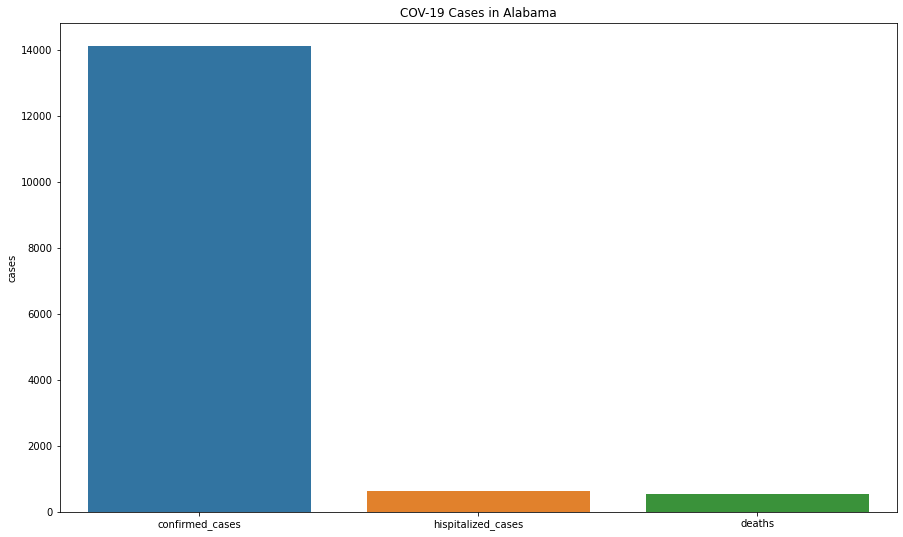

In [467]:
plt.figure(figsize=(15, 9))
sns.barplot(data=df, x=df.index, y="cases")
plt.title(f"COV-19 Cases in {state}")

In [468]:
df

,cases
confirmed_cases,14117
hispitalized_cases,645
deaths,549
